In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np



blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=20000, centers=blob_centers,
                  cluster_std = blob_std, random_state=42)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit(X)

In [13]:
X.shape

(20000, 2)

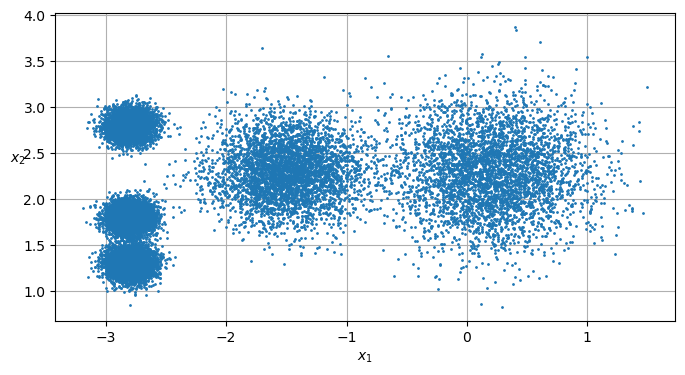

In [11]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [14]:
y_pred

KMeans(n_clusters=5, random_state=42)

In [15]:
kmeans.labels_

array([3, 1, 4, ..., 3, 3, 1], dtype=int32)

In [16]:
kmeans.cluster_centers_

array([[ 0.21932512,  2.29450604],
       [-2.7935198 ,  2.79787767],
       [-2.80040642,  1.29828066],
       [-1.46832891,  2.30446828],
       [-2.79308043,  1.80260618]])

In [17]:
#You can easily assign new instances to the cluster whose centroid
#is closest:

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)


array([0, 0, 1, 1], dtype=int32)

In [18]:
#The vast majority of the instances were clearly assigned to
#the appropriate cluster, but a few instances were probably mislabeled,
#especially near the boundary between the top-left cluster and the 
#central cluster. Indeed, the k- means algorithm does not behave very
#well when the blobs have very different diameters because all it 
#cares about when assigning an instance to a cluster is the distance
#to the centroid.

#Instead of assigning each instance to a single cluster, which is
#called hard clustering, it can be useful to give each instance a
#score per cluster, which is called soft clustering. The score can
#be the distance between the instance and the centroid or a similarity
#score (or affinity), such as the Gaussian radial basis function we
#used in Chapter 2. In the KMeans class, the transform() method 
#measures the distance from each instance to every centroid:
    
    
kmeans.transform(X_new).round(2)


#In this example, the first instance in X_new is located at a 
#distance of about 0.37, from the first centroid, 2.91 from the 
#second centroid, 2.89 from the third centroid, 1.5 from the fourth
#centroid, and 2.8 from the fifth centroid. If you have a 
#high-dimensional dataset and you transform it this way, you end
#up with a k-dimensional dataset: this transformation can be a very
#efficient nonlinear dimensionality reduction technique. 
#Alternatively, you can use these distances as extra features 
#to train another model, as in Chapter 2.


    

array([[0.37, 2.91, 2.89, 1.5 , 2.8 ],
       [2.8 , 5.85, 5.84, 4.48, 5.8 ],
       [3.3 , 0.29, 1.71, 1.68, 1.22],
       [3.23, 0.36, 1.22, 1.54, 0.73]])

In [ ]:
#Although the algorithm is guaranteed to converge, it may not 
#converge to the right solution (i.e., it may converge to a local 
#optimum): whether it does or not depends on the centroid initialization
#. Figure 9-5 shows two suboptimal solutions that the algorithm can
#converge to if you are not lucky with the random initialization step.


#Let’s take a look at a few ways you can mitigate this risk by 
#improving the centroid initialization.
#Centroid initialization methods
#If you happen to know approximately where the centroids should be
#(e.g., if you ran another clustering algorithm earlier), then you
#can set the init hyperparameter to a NumPy array containing the list
#of centroids, and set n_init to 1:

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

In [19]:
#Another solution is to run the algorithm multiple times with 
#different random initializations and keep the best solution. 
#The number of random initializations is controlled by the n_init 
#hyperparameter: by default it is equal to 10, which means that the
#whole algorithm described earlier runs 10 times when you call fit(),
#and Scikit-Learn keeps the best solution. But how exactly does it 
#know which solution is the best? It uses a performance metric! 
#That metric is called the model’s inertia, which is the sum of the
#squared distances between the instances and their closest centroids.
#It is roughly equal to 219.4 for the model on the left in Figure 9-5,
#258.6 for the model on the right in Figure 9-5, and only 211.6 for 
#the model in Figure 9- 3. The KMeans class runs the algorithm n_init 
#times and keeps the model with the lowest inertia. In this example,
#the model in Figure 9-3 will be selected (unless we are very unlucky
#with n_init consecutive random initializations). If you are curious, 
#a model’s inertia is accessible via the
#inertia_ instance variable:


kmeans.inertia_

2188.833977942637

In [20]:
#The score() method returns the negative inertia (it’s negative 
#because a predictor’s score() method must always respect Scikit-Learn’s
#“greater is better” rule: if a predictor is better than another, its
#score() method should return a greater score):

kmeans.score(X)


-2188.833977942637

In [21]:
#Yet another important variant of the k-means algorithm was proposed
#in a 2010 paper by David Sculley.5 Instead of using the full dataset
#at each iteration, the algorithm is capable of using mini-batches, 
#moving the centroids just slightly at each iteration. This speeds up
#the algorithm (typically by a factor of three to four) and makes it
#possible to cluster huge datasets that do not fit in memory. 
#Scikit-Learn implements this algorithm in the MiniBatchKMeans class,
#which you can use just like the KMeans class:


from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)


MiniBatchKMeans(n_clusters=5, random_state=42)

In [31]:
#Limits of k-means
#Despite its many merits, most notably being fast and scalable, 
#k-means is not perfect. As we saw, it is necessary to run the 
#algorithm several times to avoid suboptimal solutions, plus you 
#need to specify the number of clusters, which can be quite a hassle.
#Moreover, k-means does not behave very well when the clusters have 
#varying sizes, different densities, or nonspherical shapes. For example,
#Figure 9-11 shows how k-means clusters a dataset containing three 
#ellipsoidal clusters of different dimensions, densities, and 
#orientations.
#As you can see, neither of these solutions is any good. The solution
#on the left is better, but it still chops off 25% of the middle 
#cluster and assigns it to the cluster on the right. The solution
#on the right is just terrible, even though its inertia is lower. 
#So, depending on the data, different clustering algorithms may 
#perform better. On these types of elliptical clusters, Gaussian 
#mixture models work great.


#It is important to scale the input features (see Chapter 2) 
#before you run k-means, or the clusters may be very stretched 
#and k-means will perform poorly. Scaling the features does not 
#guarantee that all the clusters will be nice and spherical, but it 
#generally helps k-means.

#Now let’s look at a few ways we can benefit from clustering. 
#We will use k- means, but feel free to experiment with other 
#clustering algorithms.

#Using Clustering for Image Segmentation
#Image segmentation is the task of partitioning an image into 
#multiple segments. There are several variants:
#In color segmentation, pixels with a similar color get assigned 
#to the same segment. This is sufficient in many applications. 
#For example, if you want to analyze satellite images to measure 
#how much total forest area there is in a region, color segmentation
#may be just fine.
#In semantic segmentation, all pixels that are part of the same o
#bject type get assigned to the same segment. For example, in a 
#self-driving car’s vision system, all pixels that are part of a 
#pedestrian’s image might be assigned to the “pedestrian” segment 
#(there would be one segment containing all the pedestrians).

#In instance segmentation, all pixels that are part of the same 
#individual object are assigned to the same segment. In this case
#there would be a different segment for each pedestrian.



#The state of the art in semantic or instance segmentation today is
#achieved using complex architectures based on convolutional neural 
#networks (see Chapter 14). In this chapter we are going to focus on
#the (much simpler) color segmentation task, using k-means.

#We’ll start by importing the Pillow package (successor to the Python
#Imaging Library, PIL), which we’ll then use to load the ladybug.png 
#image (see the upper-left image in Figure 9-12), assuming it’s
#located at filepath:


In [32]:
#Using Clustering for Semi-Supervised Learning


#Another use case for clustering is in semi-supervised learning, when
#we have plenty of unlabeled instances and very few labeled instances.
#In this section, we’ll use the digits dataset, which is a simple
#MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing
#the digits 0 to 9. First, let’s load and split the dataset (it’s already
#shuffled):

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [33]:
#We will pretend we only have labels for 50 instances. To get a 
#baseline performance, let’s train a logistic regression model on 
#these 50 labeled instances:

from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

#We can then measure the accuracy of this model on the test set 
#(note that the test set must be labeled):
log_reg.score(X_test, y_test)

0.7481108312342569

In [34]:
#The model’s accuracy is just 74.8%. That’s not great: indeed, if you
#try training the model on the full training set, you will find that
#it will reach about 90.7% accuracy. Let’s see how we can do better.
#First, let’s cluster the training set into 50 clusters. Then, for
#each cluster, we’ll find the image closest to the centroid. We’ll
#call these images the representative images:


k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [37]:
X_digits_dist.shape

(1400, 50)

In [38]:
X_train.shape

(1400, 64)

In [39]:
X_digits_dist

array([[53.8347602 , 41.42507119, 40.38645515, ..., 46.70298587,
        43.32913642, 41.73144964],
       [22.96665235, 50.3636375 , 45.70161035, ..., 48.27458499,
        43.06000537, 50.03512655],
       [29.42934195, 50.1412468 , 43.36356873, ..., 50.49457617,
        47.66591091, 53.60050269],
       ...,
       [49.57764931, 56.45575913, 36.34319282, ..., 46.91590586,
        54.17253975, 56.99134925],
       [49.46706914, 55.89670767, 33.61503416, ..., 46.99966903,
        53.61297942, 54.25569607],
       [38.3721188 , 43.90294928, 48.93405716, ..., 43.3609143 ,
        41.15263129, 37.04745455]])

In [40]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [42]:
X_representative_digits.shape

(50, 64)

In [43]:
representative_digit_idx

array([1120,  708,  582,  925,  597,  384,  798,  970,  768,  815,  885,
       1387,  870,  141, 1084,   88, 1030,  310, 1312,  972,  410, 1168,
        213,  579,  612, 1315,  463, 1075, 1005,  199,  558,  613,  877,
       1352, 1327,  259, 1114,  652,  983,  115, 1328, 1050, 1336,  543,
        938, 1227,  881,  685,  345,  438])

In [46]:
#Let’s look at each image and manually label them:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])


#Now we have a dataset with just 50 labeled instances, but 
#instead of being random instances, each of them is a representative
#image of its cluster. Let’s see if the performance is any better:


log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [70]:
#Wow! We jumped from 74.8% accuracy to 84.9%, although we are 
#still only training the model on 50 instances. Since it is often 
#costly and painful to label instances, especially when it has to 
#be done manually by experts, it is a good idea to label representative
#instances rather than just random instances.

#But perhaps we can go one step further: what if we propagated the 
#labels to all the other instances in the same cluster? This is 
#called label propagation:
        
        
y_train_propagated = np.empty(len(X_train), dtype=np.int64)

In [71]:
y_train_propagated.shape

(1400,)

In [65]:
kmeans.labels_.shape

(1400,)

In [63]:
y_representative_digits.shape

(50,)

In [66]:
kmeans.labels_

array([32, 41, 39, ..., 40, 40, 43], dtype=int32)

In [74]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [76]:
y_train_propagated.shape

(1400,)

In [80]:
kmeans.labels_ == 1

array([False, False, False, ..., False, False, False])

In [78]:
y_representative_digits

array([1, 3, 6, 0, 7, 9, 2, 4, 8, 9, 5, 4, 7, 1, 2, 6, 1, 2, 5, 1, 4, 1,
       3, 3, 8, 8, 2, 5, 6, 9, 1, 4, 0, 6, 8, 3, 4, 6, 7, 2, 4, 1, 0, 7,
       5, 1, 9, 9, 3, 7])

In [82]:
#Now let’s train the model again and look at its performance:


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/Users/rokosango/miniforge3/envs/homl3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8967254408060453

In [2]:
#DBSCAN
#The density-based spatial clustering of applications with noise 
#(DBSCAN) algorithm defines clusters as continuous regions of high 
#density. Here is how it works:
    
    
#For each instance, the algorithm counts how many instances are 
#located within a small distance ε (epsilon) from it. This region 
#is called the instance’s ε-neighborhood.


#If an instance has at least min_samples instances in its 
#ε-neighborhood (including itself), then it is considered a core 
#instance. In other words, core instances are those that are located
#in dense regions.

#All instances in the neighborhood of a core instance belong to the
#same cluster. This neighborhood may include other core instances; 
#therefore, a long sequence of neighboring core instances forms a 
#single cluster.


#Any instance that is not a core instance and does not have one in 
#its neighborhood is considered an anomaly.



#This algorithm works well if all the clusters are well separated by 
#low- density regions. The DBSCAN class in Scikit-Learn is as simple
#to use as you might expect. Let’s test it on the moons dataset, 
#introduced in Chapter 5:


from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)

dbscan.fit(X)

DBSCAN(eps=0.05)

In [87]:
#The labels of all the instances are now available in the labels_ 
#instance variable:

dbscan.labels_[:10]


array([ 0, -1,  0,  3,  1,  2,  2,  0,  0,  3])

In [89]:
#Notice that some instances have a cluster index equal to –1, 
#which means that they are considered as anomalies by the algorithm.
#The indices of the core instances are available in the 
#core_sample_indices_ instance variable, and the core instances 
#themselves are available in the components_ instance variable:

dbscan.core_sample_indices_[:10]



array([ 0,  4,  6,  7,  8,  9, 10, 12, 13, 14])

In [96]:
dbscan.components_.shape

(791, 2)

In [92]:
#This clustering is represented in the lefthand plot of Figure 9-14. 
#As you can see, it identified quite a lot of anomalies, plus seven 
#different clusters. How disappointing! Fortunately, if we widen each 
#instance’s neighborhood by increasing eps to 0.2, we get the clustering
#on the right, which looks perfect. Let’s continue with this model.


#Surprisingly, the DBSCAN class does not have a predict() method, 
#although it has a fit_predict() method. In other words, it cannot 
#predict which cluster a new instance belongs to. This decision was 
#made because different classification algorithms can be better for 
#different tasks, so the authors decided to let the user choose which
#one to use. Moreover, it’s not hard to implement. For example, let’s 
#train a KNeighborsClassifier:


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
# x=core instances, y=labels of those core instances


KNeighborsClassifier(n_neighbors=50)

In [93]:
#Now, given a few new instances, we can predict which clusters they most
#likely belong to and even estimate a probability for each cluster:

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([5, 4, 0, 2])

In [94]:
knn.predict_proba(X_new)

array([[0.  , 0.14, 0.  , 0.  , 0.28, 0.58, 0.  ],
       [0.06, 0.  , 0.  , 0.  , 0.94, 0.  , 0.  ],
       [0.74, 0.  , 0.26, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [107]:
#Note that we only trained the classifier on the core instances, but
#we could also have chosen to train it on all the instances, or all 
#but the anomalies: this choice depends on the final task.


y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  4,  0, -1])

In [ ]:
#In short, DBSCAN is a very simple yet powerful algorithm capable of 
#identifying any number of clusters of any shape. It is robust to 
#outliers, and it has just two hyperparameters (eps and min_samples).
#If the density varies significantly across the clusters, however, or
#if there’s no sufficiently low-density region around some clusters,
#DBSCAN can struggle to capture all the clusters properly. Moreover,
#its computational complexity is roughly O(m2n), so it does not scale
#well to large datasets.


#TIP
#You may also want to try hierarchical DBSCAN (HDBSCAN), which is 
#implemented in the scikit-learn-contrib project, as it is usually 
#better than DBSCAN at finding clusters of varying densities.



In [17]:
#Gaussian Mixtures

#A Gaussian mixture model (GMM) is a probabilistic model that 
#assumes that the instances were generated from a mixture of several
#Gaussian distributions whose parameters are unknown. All the instances
#generated from a single Gaussian distribution form a cluster that 
#typically looks like an ellipsoid. Each cluster can have a different
#ellipsoidal shape, size, density, and orientation, just like in
#Figure 9-11. When you observe an instance, you know it was generated
#from one of the Gaussian distributions, but you are not told which
#one, and you do not know what the parameters of these distributions are.



#There are several GMM variants. In the simplest variant, implemented
#in the GaussianMixture class, you must know in advance the number k 
#of Gaussian distributions. The dataset X is assumed to have been 
#generated through the following probabilistic process:


#So what can you do with such a model? Well, given the dataset X, you 
#typically want to start by estimating the weights φ and all the 
#distribution parameters μ(1) to μ(k) and Σ(1) to Σ(k). 
#Scikit-Learn’s GaussianMixture class makes this super easy:

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [4]:
gm.weights_

array([0.60004901, 0.20538315, 0.19456785])

In [5]:
gm.means_

array([[ 0.51575815,  0.23655838],
       [-0.73913692,  0.56405816],
       [ 1.76252366, -0.03852565]])

In [6]:
gm.covariances_

array([[[ 0.17551545, -0.10705901],
        [-0.10705901,  0.29020979]],

       [[ 0.05416888,  0.06121707],
        [ 0.06121707,  0.08695673]],

       [[ 0.04457658,  0.05661628],
        [ 0.05661628,  0.08603756]]])

In [10]:
X.shape

(1000, 2)

In [ ]:
#Great, it worked fine! Indeed, two of the three clusters were 
#generated with 500 instances each, while the third cluster only 
#contains 250 instances. So the true cluster weights are 0.4, 0.4, 
#and 0.2, respectively, and that’s roughly what the algorithm found. 
#Similarly, the true means and covariance matrices are quite close to 
#those found by the algorithm. But how? This class relies on the
#expectation-maximization (EM) algorithm, which has many similarities
#with the k-means algorithm: it also initializes the cluster parameters 
#randomly, then it repeats two steps until convergence, first assigning 
#instances to clusters (this is called the expectation step) and then
#updating the clusters (this is called the maximization step). Sounds 
#familiar, right? In the context of clustering, you can think of EM
#as a generalization of k-means that not only finds the cluster centers
#(μ(1) to μ(k)), but also their size, shape, and orientation (Σ(1) to
#Σ(k)), as well as their relative weights (φ(1) to φ(k)). Unlike
#k-means, though, EM uses soft cluster assignments, not hard 
#assignments. For each instance, during the expectation step, the
#algorithm estimates the probability that it belongs to each cluster
#(based on the current cluster parameters). Then, during the 
#maximization step, each cluster is updated using all the instances 
#in the dataset, with each instance weighted by the estimated 
#probability that it belongs to that cluster. These probabilities are
#called the responsibilities of the clusters for the instances. During 
#the maximization step, each cluster’s update will mostly be impacted
#by the instances it is most responsible for.


#Unfortunately, just like k-means, EM can end up converging to poor 
#solutions, so it needs to be run several times, keeping only the 
#best solution. This is why we set n_init to 10. Be careful: by 
#default n_init is set to 1.

In [11]:
gm.converged_

True

In [12]:
gm.n_iter_

17

In [14]:
#Now that you have an estimate of the location, size, shape, 
#orientation, and relative weight of each cluster, the model can 
#easily assign each instance to the most likely cluster (hard clustering)
#or estimate the probability that it belongs to a particular cluster 
#(soft clustering). Just use the predict() method for hard clustering,
#or the predict_proba() method for soft clustering:

gm.predict(X)[:10]

array([0, 2, 0, 0, 2, 2, 2, 0, 0, 0])

In [15]:
gm.predict_proba(X).round(3)

array([[1.   , 0.   , 0.   ],
       [0.001, 0.   , 0.999],
       [1.   , 0.   , 0.   ],
       ...,
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ]])

In [18]:
#A Gaussian mixture model is a generative model, meaning you can 
#sample new instances from it (note that they are ordered by cluster
#index):

X_new, y_new = gm.sample(6)
X_new

array([[ 0.4550797 ,  0.2370624 ],
       [ 1.15955566,  0.12094283],
       [ 0.81360972,  0.40495105],
       [ 1.19270785,  0.03126418],
       [ 1.80071991, -0.00677528],
       [ 1.72123542,  0.09811061]])

In [19]:
y_new

array([0, 0, 0, 0, 2, 2])

In [21]:
#It is also possible to estimate the density of the model at any 
#given location. This is achieved using the score_samples() method:
#for each instance it is given, this method estimates the log of 
#the probability density function (PDF) at that location. The greater
#the score, the higher the density:

gm.score_samples(X).round(2)[:10]

array([-1.5 , -0.24, -1.85, -1.53,  0.01,  0.12, -0.65, -1.29, -1.56,
       -1.9 ])

In [ ]:
#If you compute the exponential of these scores, you get the value 
#of the PDF at the location of the given instances. These are not 
#probabilities, but probability densities: they can take on any 
#positive value, not just a value between 0 and 1. To estimate 
#the probability that an instance will fall within a particular
#region, you would have to integrate the PDF over that region 
#(if you do so over the entire space of possible instance locations,
#the result will be 1).

#Figure 9-16 shows the cluster means, the decision boundaries 
#(dashed lines), and the density contours of this model.



#Nice! The algorithm clearly found an excellent solution. Of course, 
#we made its task easy by generating the data using a set of 2D Gaussian
#distributions (unfortunately, real-life data is not always so Gaussian
#and low-dimensional). We also gave the algorithm the correct number of 
#clusters. When there are many dimensions, or many clusters, or few 
#instances, EM can struggle to converge to the optimal solution. You
#might need to reduce the difficulty of the task by limiting the number
#of parameters that the algorithm has to learn. One way to do this is
#to limit the range of shapes and orientations that the clusters can 
#have. This can be achieved by imposing constraints on the covariance 
#matrices. To do this, set the covariance_type hyperparameter to one
#of the following values:

#"spherical"
#All clusters must be spherical, but they can have different diameters
#(i.e., different variances).

#"diag"
#Clusters can take on any ellipsoidal shape of any size, but the 
#ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).


#"tied"
#All clusters must have the same ellipsoidal shape, size, and 
#orientation (i.e., all clusters share the same covariance matrix).


#By default, covariance_type is equal to "full", which means that
#each cluster can take on any shape, size, and orientation (it has
#its own unconstrained covariance matrix). Figure 9-17 plots the 
#solutions found by the EM algorithm when covariance_type is set
#to "tied" or "spherical".


#NOTE
#The computational complexity of training a GaussianMixture model 
#depends on the number of instances m, the number of dimensions n, 
#the number of clusters k, and the constraints on the covariance 
#matrices. If covariance_type is "spherical" or "diag", it is O(kmn), 
#assuming the data has a clustering structure. If covariance_type is 
#"tied" or "full", it is O(kmn2 + kn3), so it will not scale to large
#numbers of features.


#Gaussian mixture models can also be used for anomaly detection. 
#We’ll see how in the next section.

In [24]:
#Using Gaussian Mixtures for Anomaly Detection
#Using a Gaussian mixture model for anomaly detection is quite simple:
#any instance located in a low-density region can be considered an 
#anomaly. You must define what density threshold you want to use. For 
#example, in a manufacturing company that tries to detect defective 
#products, the ratio of defective products is usually well known. Say
#it is equal to 2%. You then set the density threshold to be the value
#that results in having 2% of the instances located in areas below that
#threshold density. If you notice that you get too many false positives
#(i.e., perfectly good products that are flagged as defective), you can
#lower the threshold. Conversely, if you have too many false negatives
#(i.e., defective products that the system does not flag as defective),
#you can increase the threshold. This is the usual precision/recall
#trade-off (see Chapter 3). Here is how you would identify the outliers
#using the fourth percentile lowest density as the threshold (i.e.,
#approximately 4% of the instances will be flagged as anomalies):
        
        
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
        

In [25]:
density_threshold = np.percentile(densities, 2)

In [26]:
density_threshold

-2.3648379305947973

In [29]:
densities.shape

(1000,)

In [30]:
np.percentile(densities, 2)

-2.3648379305947973

In [32]:
anomalies = X[densities < density_threshold]

In [ ]:
#A closely related task is novelty detection: it differs from anomaly
#detection in that the algorithm is assumed to be trained on a “clean”
#dataset, uncontaminated by outliers, whereas anomaly detection does 
#not make this assumption. Indeed, outlier detection is often used to 
#clean up a dataset.



#Gaussian mixture models try to fit all the data, including the 
#outliers; if you have too many of them this will bias the model’s 
#view of “normality”, and some outliers may wrongly be considered as 
#normal. If this happens, you can try to fit the model once, use it
#to detect and remove the most extreme outliers, then fit the model
#again on the cleaned-up dataset. Another approach is to use robust
#covariance estimation methods (see the EllipticEnvelope class).


#Just like k-means, the GaussianMixture algorithm requires you to specify
#the number of clusters. So how can you find that number?   

In [ ]:
#Selecting the Number of Clusters
#With k-means, you can use the inertia or the silhouette score to select
#the appropriate number of clusters. But with Gaussian mixtures, it is
#not possible to use these metrics because they are not reliable when 
#the clusters are not spherical or have different sizes. Instead, you 
#can try to find the model that minimizes a theoretical information 
#criterion, such as the Bayesian information criterion (BIC) or the 
#Akaike information criterion (AIC), defined in Equation 9-1.

In [ ]:
#Both the BIC and the AIC penalize models that have more parameters to
#learn (e.g., more clusters) and reward models that fit the data well.
#They often end up selecting the same model. When they differ, the model
#selected by the BIC tends to be simpler (fewer parameters) than the one
#selected by the AIC, but tends to not fit the data quite as well 
#(this is especially true for larger datasets).

In [ ]:
#In short, the PDF is a function of x (with θ fixed), while the likelihood
#function is a function of θ (with x fixed). It is important to understand
#that the likelihood function is not a probability distribution: if you
#integrate a probability distribution over all possible values of x, you
#always get 1, but if you integrate the likelihood function over all
#possible values of θ the result can be any positive value.
#Given a dataset X, a common task is to try to estimate the most likely
#values for the model parameters. To do this, you must find the values
#that maximize the likelihood function, given X. In this example, if you
#have observed a single instance x=2.5, the maximum likelihood estimate
#is possible to take it into account by maximizing L(θ|x)g(θ) rather than 
#just maximizing L(θ|x). This is called maximum a-posteriori (MAP) (MLE) 
#of θ is 𝛉=1.5. If a prior probability distribution g over θ exists, it ˆ
#estimation. Since MAP constrains the parameter values, you can think
#of it as a regularized version of MLE.
#Notice that maximizing the likelihood function is equivalent to
#maximizing its logarithm (represented in the lower-right plot in
#Figure 9-19). Indeed, the logarithm is a strictly increasing function, so
#if θ maximizes the log likelihood, it also maximizes the likelihood. It
#turns out that it is generally easier to maximize the log likelihood. For
#example, if you observed several independent instances x(1) to x(m), you
#would need to find the value of θ that maximizes the product of the
#individual likelihood functions. But it is equivalent, and much simpler,
#to maximize the sum (not the product) of the log likelihood functions,
#thanks to the magic of the logarithm which converts products into sums:
#log(ab) = log(a) + log(b).

#Once you have estimated 𝛉, the value of θ that maximizes the
#likelihood function, then you are ready to compute 𝛉 ,
#which is the value used to compute the AIC and BIC; you can think of 
#it as a measure of how well the model fits the data.


In [33]:
gm.bic(X)

2767.095745566612

In [35]:
gm.aic(X)

2683.6639058239157

In [ ]:
#Figure 9-20 shows the BIC for different numbers of clusters k. As you can see, both the BIC and the
#AIC are lowest when k=3, so it is most likely the best choice.

In [36]:
#Bayesian Gaussian Mixture Models
#Rather than manually searching for the optimal number of clusters, you can use the
#BayesianGaussianMixture class, which is capable of giving weights equal (or close) to zero 
#to unnecessary clusters. Set the number of clusters n_components to a value that you have 
#good reason to believe is greater than the optimal number of clusters (this assumes some 
#minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary 
#clusters automatically. For example, let’s set the number of clusters to 10 and see what happens:
    
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [37]:
bgm.weights_.round(2)

array([0.13, 0.16, 0.13, 0.06, 0.14, 0.09, 0.16, 0.12, 0.  , 0.  ])

In [ ]:
#Perfect: the algorithm automatically detected that only three clusters are needed, and the resulting 
#clusters are almost identical to the ones in Figure 9-16.


#A final note about Gaussian mixture models: although they work great on clusters with 
#ellipsoidal shapes, they don’t do so well with clusters of very different shapes. For example,
#let’s see what happens if we use a Bayesian Gaussian mixture model to cluster the moons dataset (see Figure 9-21).

#Oops! The algorithm desperately searched for ellipsoids, so it found eight different clusters instead 
#of two. The density estimation is not too bad, so this model could perhaps be used for anomaly detection,
#but it failed to identify the two moons. To conclude this chapter, let’s take a quick look at a few 
#algorithms capable of dealing with arbitrarily shaped clusters.







